In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Math, display, Latex

plt.rcParams['figure.figsize'] = (10,5)

In [18]:
# Función de umbral o de salto

def umbral(x):
    return np.where(x>=0, 1, -1)

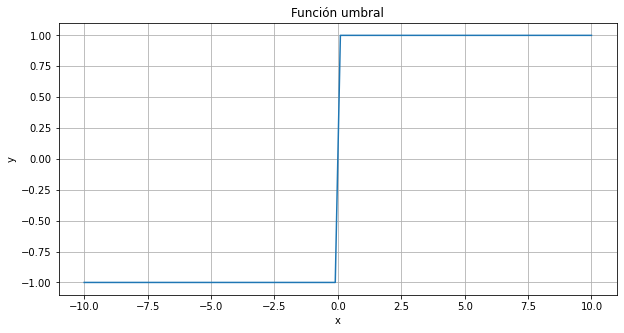

In [19]:
u=np.linspace(-10,10,100)
y=umbral(u)
plt.plot(u,y)
plt.title('Función umbral')
plt.axis('on')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

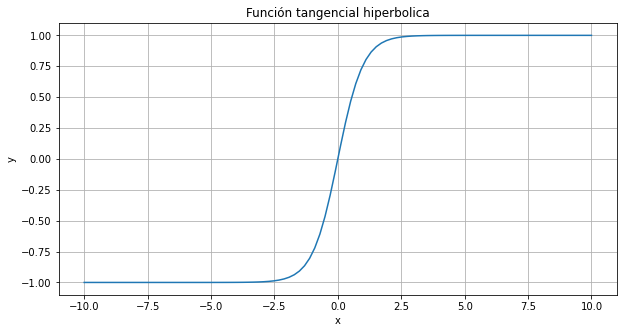

In [21]:
# Funcion tangencial

y=np.tanh(u)
plt.plot(u,y)
plt.title('Función tangencial hiperbolica')
plt.axis('on')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [22]:
# Funcion RELU (Rectifier Lineal Unit)

def relu(x):
    d=np.zeros((len(x),1))
    for i in range(len(x)):
        if x[i]>=0:
            d[i]=x[i]
    return d

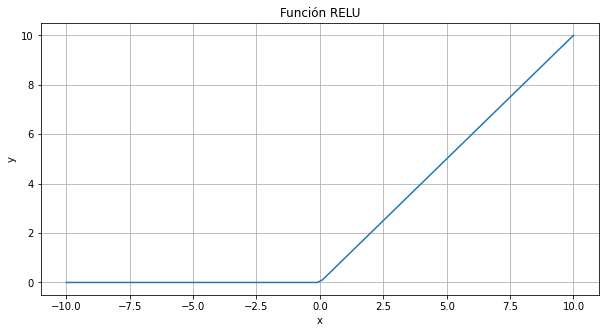

In [24]:
y=relu(u)
plt.plot(u,y)
plt.title('Función RELU')
plt.axis('on')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [25]:
# El perceptron
import pandas as pd

data={'x1':[1,1,-1,-1], 'x2':[1,-1,1,-1], 'AND':[1,-1,-1,-1]}
df = pd.DataFrame(data, columns=['x1','x2','AND'])
df.head()

,x1,x2,AND
0,1,1,1
1,1,-1,-1
2,-1,1,-1
3,-1,-1,-1


In [27]:
X=df.drop(columns='AND')
X

,x1,x2
0,1,1
1,1,-1
2,-1,1
3,-1,-1


In [30]:
# Insertamos la columna bias como variable independiente y que sea considerada como un peso mas del modelo
X.insert(2,'bias',[1,1,1,1])
X

ValueError: cannot insert bias, already exists

In [31]:
Y=df[['AND']]
Y.head()

,AND
0,1
1,-1
2,-1
3,-1


In [32]:
X=np.array(X)
Y=np.array(Y)

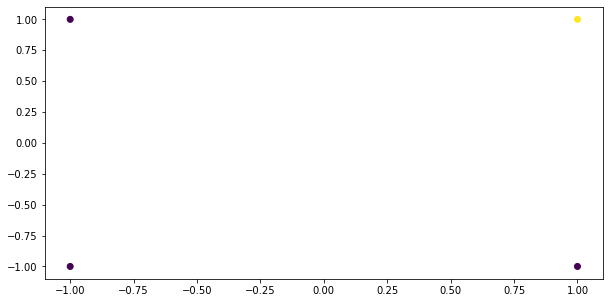

In [33]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [55]:
class perceptron():
    def __init__(self, dim_entrada):
        self.W=np.random.rand(1,dim_entrada)
        
    def activacion(self,a):
        return np.where(a>=0,1, -1)
    
    def entrenamiento(self, x ,y, entrenar=True):
        salida=self.activacion(self.W@x.T)
        if entrenar:
            continuar=True
            if np.any(salida!=y):
                for i in range(len(y)):
                    if salida[0,i]!=y[i]:
                        self.W+=y[i]*x[i]
                salida=self.activacion(self.W@x.T)
        return salida, self.W

In [56]:
# Se crea la red
red = perceptron(3)

In [57]:
# Pesos iniciales generados aleatoriamente
red.W

array([[0.31102434, 0.98668751, 0.19520512]])

Pesos(W)=[[0.31102434 0.98668751 0.19520512]]
Salida(W)=[[ 1 -1  1 -1]]
Ecuación de la recta: y=-0.315x+-0.198


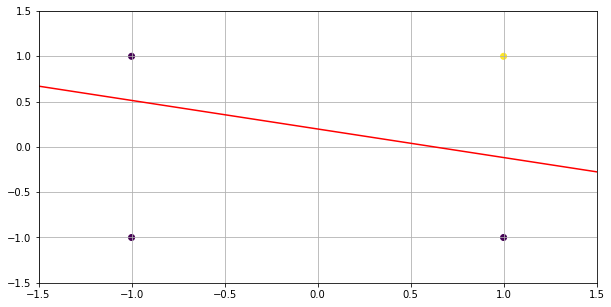

In [58]:
# Estado inicial de la red
salida= red.entrenamiento(X,Y,False)[0] # El False indica que no está entrenado

x = np.linspace(-1.5,1.5,50)
y = -(red.W[0,0]/red.W[0,1]*x-red.W[0,2]/red.W[0,1])

print('Pesos(W)={}'.format(red.W))
print('Salida(W)={}'.format(salida))
print('Ecuación de la recta: y={0:4.3f}x+{1:4.3f}'.format(-red.W[0,0]/red.W[0,1],-red.W[0,2]/red.W[0,1]))

plt.scatter(X[:,0],X[:,1],c=Y)
plt.axis([-1.5,1.5,-1.5,1.5])
plt.plot(x,y,'r')
plt.grid()
plt.show()

Pesos(W)=[[ 1.31102434  1.98668751 -0.80479488]]
Salida(W)=[[ 1 -1 -1 -1]]
Ecuación de la recta: y=-0.660x+0.405


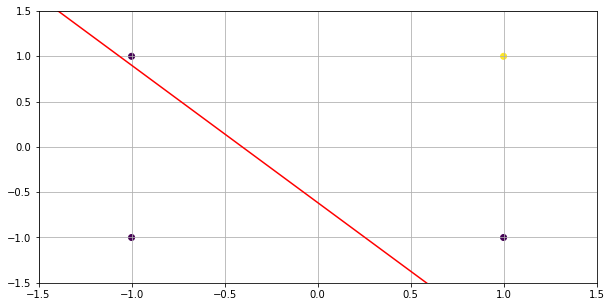

In [63]:
# Dibujamos la recta de clasificación
salida= red.entrenamiento(X,Y)[0]

y = -(red.W[0,1]/red.W[0,0]*x-red.W[0,2]/red.W[0,0])

# Imprimimos los valores de los pesos, salidas de la red y ecuación de la recta de clasificación
print('Pesos(W)={}'.format(red.W))
print('Salida(W)={}'.format(salida))
print('Ecuación de la recta: y={0:4.3f}x+{1:4.3f}'.format(-red.W[0,0]/red.W[0,1],-red.W[0,2]/red.W[0,1]))

plt.scatter(X[:,0],X[:,1],c=Y)
plt.axis([-1.5,1.5,-1.5,1.5])
plt.plot(x,y,'r')
plt.grid()
plt.show()

In [74]:
u=np.array([0,0,1])

In [75]:
print(red.activacion(red.W@u.T))

[-1]


In [83]:
from sklearn.datasets import make_classification

# Creamos dos clusters con distribucion normal linealmente separable
# Total patrones 100
n_datos = 100
X,Y = make_classification(n_samples=n_datos, n_features=2, n_informative=2, n_repeated=0, n_clusters_per_class=1, n_redundant=0, class_sep=2)

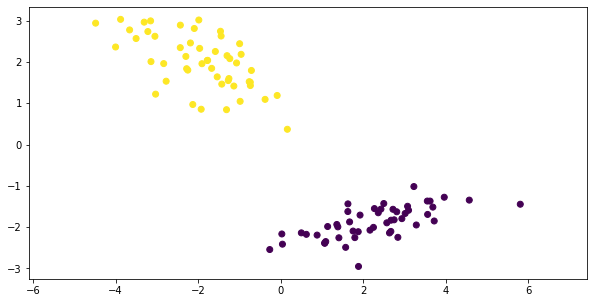

In [84]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.axis('equal')
plt.show()

In [85]:
d=np.ones((n_datos,1))
X=np.hstack((X,d))
X.shape

(100, 3)

In [86]:
Y=np.where(Y==0, -1, 1)

In [87]:
# Creamos una red que va a recibir 3 componentes
net = perceptron(3)

Pesos(W)=[[ 1.31102434  1.98668751 -0.80479488]]
Salida(W)=[[ 1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1
   1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1
   1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1
   1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1
   1 -1  1  1]]
Ecuación de la recta: y=-0.660x+0.405


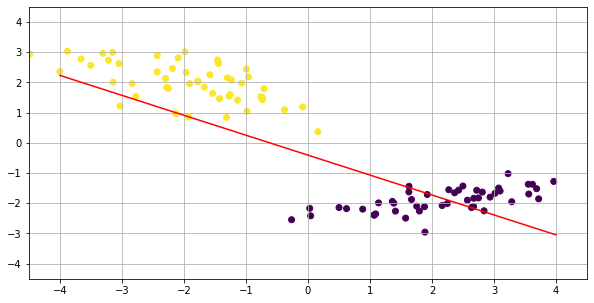

In [92]:
salida= red.entrenamiento(X,Y,False)[0] # El False indica que no está entrenado

x = np.linspace(-4,4,100)
y = -(red.W[0,0]/red.W[0,1]*x-red.W[0,2]/red.W[0,1])

print('Pesos(W)={}'.format(red.W))
print('Salida(W)={}'.format(salida))
print('Ecuación de la recta: y={0:4.3f}x+{1:4.3f}'.format(-red.W[0,0]/red.W[0,1],-red.W[0,2]/red.W[0,1]))

plt.scatter(X[:,0],X[:,1],c=Y)
plt.axis([-4.5,4.5,-4.5,4.5])
plt.plot(x,y,'r')
plt.grid()
plt.show()

Pesos(W)=[[-78.88982989  42.70760647   2.19520512]]
Salida(W)=[[ 1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1
   1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1
  -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1
   1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1
  -1 -1  1 -1]]
Ecuación de la recta: y=1.847x+-0.051


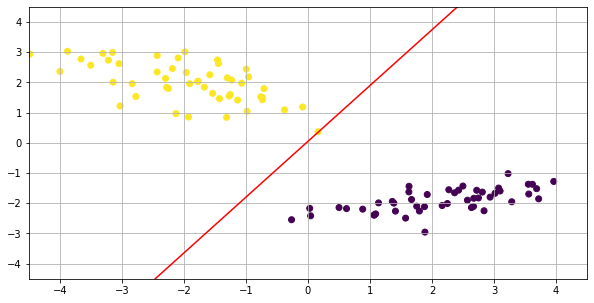

In [99]:
# Dibujamos la recta de clasificación
salida= red.entrenamiento(X,Y)[0]

y = -(red.W[0,0]/red.W[0,1]*x-red.W[0,2]/red.W[0,1])

# Imprimimos los valores de los pesos, salidas de la red y ecuación de la recta de clasificación
print('Pesos(W)={}'.format(red.W))
print('Salida(W)={}'.format(salida))
print('Ecuación de la recta: y={0:4.3f}x+{1:4.3f}'.format(-red.W[0,0]/red.W[0,1],-red.W[0,2]/red.W[0,1]))

plt.scatter(X[:,0],X[:,1],c=Y)
plt.axis([-4.5,4.5,-4.5,4.5])
plt.plot(x,y,'r')
plt.grid()
plt.show()

In [100]:
# Numero de patrones bien clasificados
np.sum(np.where(salida==Y,1,0))

100